In [3]:
import tensorflow as tf

In [4]:
mnistdataset = tf.keras.datasets.mnist

In [5]:
mnistdataset  

<module 'keras.datasets.mnist' from 'C:\\Users\\Rajan Thakur\\anaconda3\\Lib\\site-packages\\keras\\datasets\\mnist\\__init__.py'>

In [8]:
(x_train,y_train),(x_test,y_test) = mnistdataset.load_data()

In [9]:
x_train.shape 

(60000, 28, 28)

In [11]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [13]:
import matplotlib.pyplot as plt

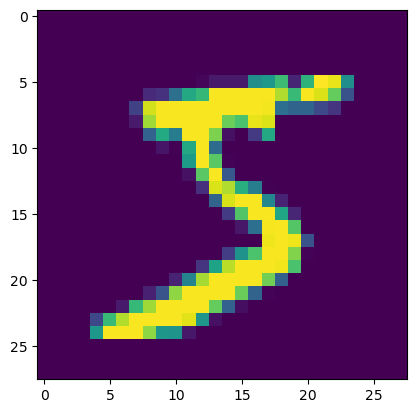

In [14]:
plt.imshow(x_train[0])
plt.show()

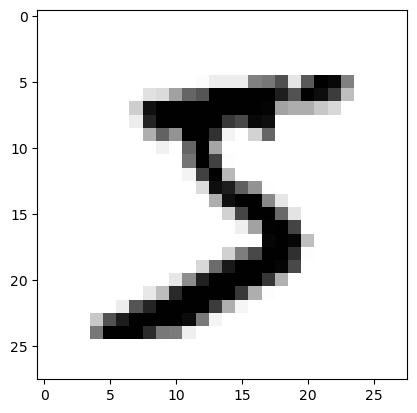

In [16]:
plt.imshow(x_train[0], cmap=plt.cm.binary)

In [18]:
print (x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

# DATA PRE-PROCESSING

In [19]:
#NORMALIZATION
#Method1:train[0]\255
#Method2: builtin funtion

In [20]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

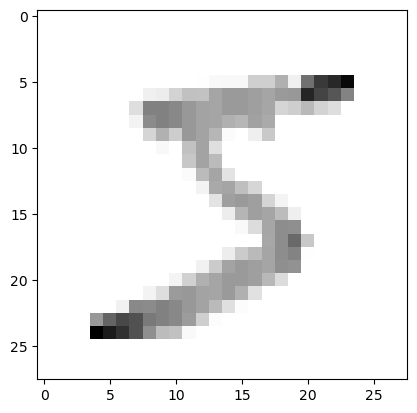

In [21]:
plt.imshow(x_train[0],cmap=plt.cm.binary)

In [22]:
print (x_train[0])  #all values will be between 0 to 1 only

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [23]:
print (y_train[0])

5


In [24]:
#step2 of DATA PREprocessing 

In [25]:
#changing the dimension of array /resizing the image  to make suitable for CONVOLUTION 

In [26]:
import numpy as np
img_size=28
x_trainr = np.array(x_train).reshape(-1,img_size, img_size,1) #incresing one dimension in each image for kernal operation
x_testr = np.array(x_test).reshape(-1,img_size, img_size,1)
print ("Training samples dimensions=", x_trainr.shape)
print ("testing smples dimensions=" ,x_testr.shape)

Training samples dimensions= (60000, 28, 28, 1)
testing smples dimensions= (10000, 28, 28, 1)


# lets CREATE NEURAL NETWORK MODEL

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [29]:
model=Sequential()
model.add(Conv2D(64,(3,3), input_shape= x_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

C:\Users\Rajan Thakur\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [31]:
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

In [33]:
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

In [34]:
#fully connected layer

In [35]:
model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

In [36]:
#2nd fully connected layer

In [37]:

model.add(Dense(32))
model.add(Activation("relu"))

In [38]:
#3rd fully connected layer

In [39]:

model.add(Dense(10))
model.add(Activation("softmax"))

In [40]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 26, 26, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 11, 11, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 3, 3, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 1, 1, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             330 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 81,066 (316.66 KB)

 Trainable params: 81,066 (316.66 KB)

 Non-trainable params: 0 (0.00 B)

In [41]:
print("total training samples=",len(x_trainr))

total training samples= 60000


In [42]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

# TRAINING NEURAL NETWORK MODEL

In [43]:
history=model.fit(x_trainr, y_train, epochs=5, validation_split = 0.3)

Epoch 1/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 59s 43ms/step - accuracy: 0.7629 - loss: 0.7143 - val_accuracy: 0.9659 - val_loss: 0.1115
Epoch 2/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 59s 45ms/step - accuracy: 0.9646 - loss: 0.1125 - val_accuracy: 0.9705 - val_loss: 0.0972
Epoch 3/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 78s 42ms/step - accuracy: 0.9773 - loss: 0.0743 - val_accuracy: 0.9734 - val_loss: 0.0880
Epoch 4/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 87s 46ms/step - accuracy: 0.9827 - loss: 0.0537 - val_accuracy: 0.9772 - val_loss: 0.0766
Epoch 5/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 59s 45ms/step - accuracy: 0.9862 - loss: 0.0427 - val_accuracy: 0.9825 - val_loss: 0.0617


In [45]:
loss = history.history['loss']
val_loss = history.history['val_loss']

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']


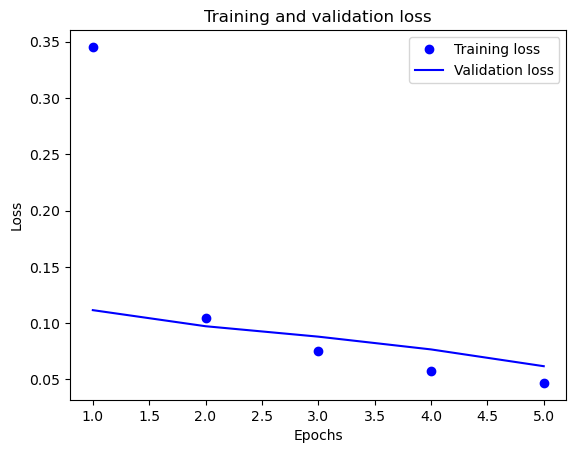

In [46]:


epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


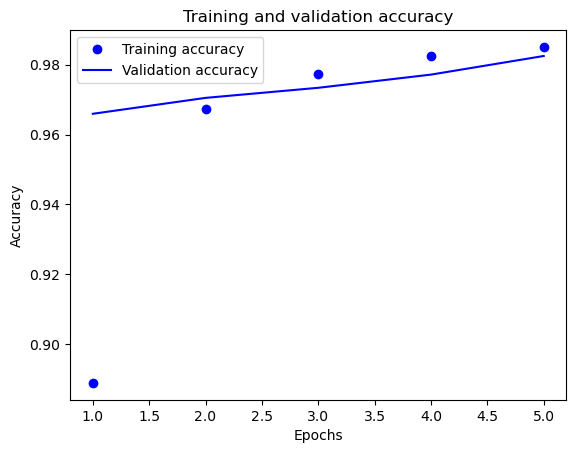

In [47]:
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


# EVALUTEING model

In [68]:
test_loss, test_acc=model.evaluate(x_testr,y_test)
print("test loss on 10,000 test samples", test_loss)
print("validation accuracy  on 10,000 test samples", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9791 - loss: 0.0704
test loss on 10,000 test samples 0.05636479705572128
validation accuracy  on 10,000 test samples 0.984499990940094


In [ ]:
#prediction

In [69]:
predicions=model.predict([x_testr])

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


In [70]:
print(predicions)

[[1.0211022e-08 1.2390861e-05 2.0637997e-07 ... 9.9995732e-01
  4.7601287e-09 4.2666298e-07]
 [2.6860139e-06 1.1091469e-06 9.9996698e-01 ... 1.8840874e-05
  4.7593276e-06 2.9911401e-08]
 [3.1099673e-06 9.9993742e-01 1.5854496e-06 ... 7.8226446e-07
  1.0274791e-06 1.1613920e-06]
 ...
 [1.4974948e-08 2.8613833e-06 5.8375385e-06 ... 1.1810610e-05
  2.9425675e-07 1.7908957e-05]
 [6.1378314e-06 3.0272321e-07 5.5904224e-05 ... 2.1226236e-07
  4.6342211e-05 1.5454350e-05]
 [2.0783613e-04 1.4307894e-09 4.9881273e-06 ... 2.2259658e-10
  1.9386837e-06 2.3589144e-05]]


In [71]:
print(np.argmax(predicions[0]))

7


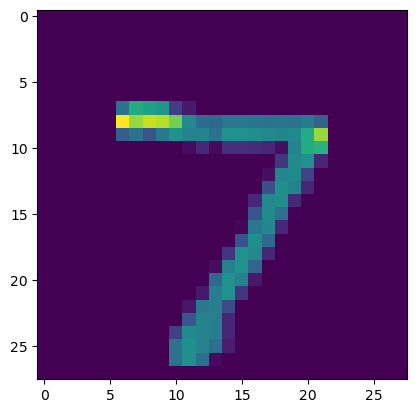

In [72]:
plt.imshow(x_test[0])

In [73]:
print(np.argmax(predicions[128]))

8


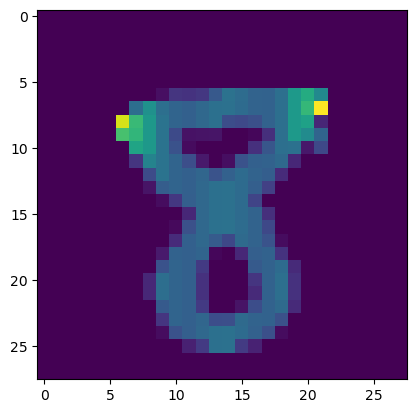

In [74]:
plt.imshow(x_test[128])

In [ ]:
#TESTING on ANY unseen DIGIT from user 

In [48]:
import cv2

In [49]:
img = cv2.imread('img1.png')

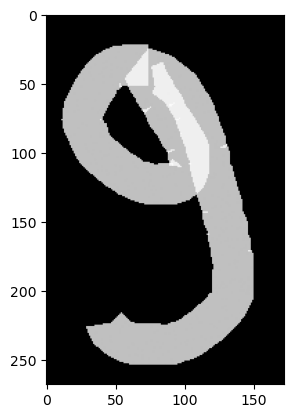

In [50]:
plt.imshow(img)

In [51]:
img.shape

(268, 172, 3)

In [52]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [53]:
gray.shape

(268, 172)

In [54]:
resized= cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)

In [55]:
resized.shape

(28, 28)

In [82]:
#NORMALIZE

In [56]:
newimg = tf.keras.utils.normalize(resized, axis=1)

In [57]:
newimg= np.array(newimg).reshape(-1, img_size, img_size, 1)

In [58]:
newimg.shape

(1, 28, 28, 1)

In [ ]:
#prediction

In [59]:
predicions = model.predict(newimg)
print(np.argmax(predicions))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
9
